In [12]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad, quadrature, romberg
from scipy.special import jv # Bessel function of 1st kind

In [7]:
%run ./special_functions.ipynb

In [66]:
# no simplification
def integrand1(la, r, t, a, tau):
    return np.exp(-a**2*la**2/4)/(la**4+tau**(-2)) * (np.exp(-t/tau) - 
                                                    np.cos(la**2*t)+np.sin(la**2*t)/(la**2*tau)) * la * jv(0, r*la)
def w1(r, t, params):
    a, tau, P = params
    val, _ = quad(integrand1, 0, 100, args=(r,t,a,tau),
                 limit=300, epsabs=1e-4)
    return P/(2*np.pi) * val


# with simplification
def integrand2(la,r,t,a):
    return np.exp(-a**2*la**2/4) * np.sin(la**2*t) * la**3 * jv(0, r*la)

def w2(r,t,params):
    a, j = params
    val, _ = quad(integrand2, 0, 100, args=(r,t,a),
                 limit=600, epsabs=1e-6)
    return -j/(2*np.pi) * val

#stationary phase approximation
def w_sf(r,t,params):
    a, j = params
    return -j/(4*np.pi*t**2)*np.exp(-a**2 * r**2 / (16 * t**2))*r**2/(4*t)*np.cos(r**2/(4*t))


# using the hankel module
def integrand3(la, t, a):
    return np.exp(-a**2*la**2/4) * np.sin(la**2*t) * la**2

def w3(r,t,params):
    a, j = params
    f = lambda x: integrand3(x, t, a)
    return -j/(2*np.pi) * ht.transform(f, k=r, ret_err=False, inverse=True)


## No simplification

In [54]:
a = 1
tau = 0.1
P = 1
params1 = (a,tau,P)
r_sections = [50]
t = np.linspace(0, 100, 1000)
w_solution1 = solve(w1, r_sections, t, params1)

C:\Users\imjob\AppData\Local\Temp/ipykernel_7424/1863434951.py:7: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  val, _ = quad(integrand1, 0, 100, args=(r,t,a,tau),


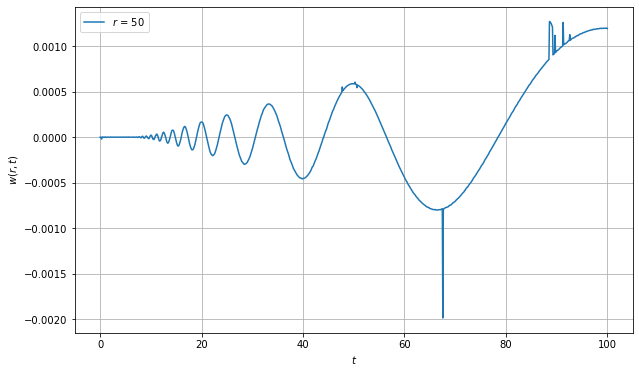

In [55]:
plot_results(t, w_solution1, r_sections, figname=None, 
             lgd=r'$r$', xl=r'$t$', yl=r'$w(r,t)$', title=None)

## With simplification

### acceleration from time with r-sections

In [25]:
a = 1
j = 1
params2 = (a,j)
r_sections = [50, 200, 400]
t = np.linspace(0, 100, 2000)
w_solution2 = solve(w2, r_sections, t, params2)

C:\Users\imjob\AppData\Local\Temp/ipykernel_11412/1169588782.py:18: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  val, _ = quad(integrand2, 0, 100, args=(r,t,a),


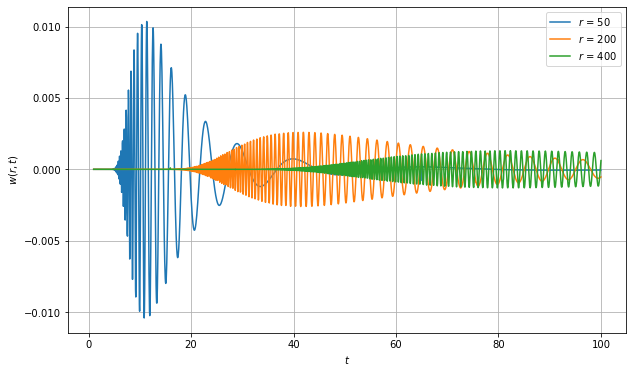

In [62]:
name = 'plate_acceleration_r=[50,200,400]'
plot_results(t, w_solution2, r_sections, figname=None, 
             lgd=r'$r$', xl=r'$t$', yl=r'$w(r,t)$', title=None)

### acceleration from radius with time sections

In [67]:
w2_time = lambda t,r,params: w2(r,t,params)
a = 1
j = 1
params4 = (a,j)
t_sections = [10, 20, 50]
r = np.linspace(0, 400, 2000)
w_solution4 = solve(w2_time, t_sections, r, params4)

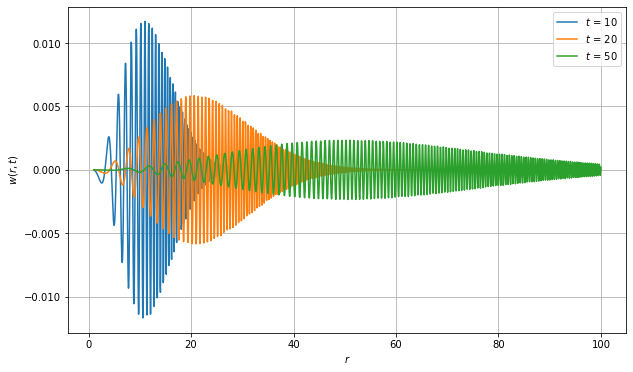

In [82]:
name = 'plate_acceleration_t=[10,20,50]'
plot_results(t, w_solution4, t_sections, figname=None, 
             lgd=r'$t$', xl=r'$r$', yl=r'$w(r,t)$', title=None)

## Stationary phase approximation

$$ \ddot{w}\left(r,t\right)=-\frac{j}{4\pi t^{2}}\exp\left(-\frac{a^{2}r^{2}}{16t^{2}}\right)\cdot\frac{r^{2}}{4t}\cos\left(\frac{r^{2}}{4t}\right) $$

### acceleration from time with r-sections

In [58]:
a = 1
j = 1
params_sf = (a,j)
r_sections = [50, 200, 400]
t = np.linspace(1, 100, 2000)
w_solution_sf = solve(w_sf, r_sections, t, params_sf)

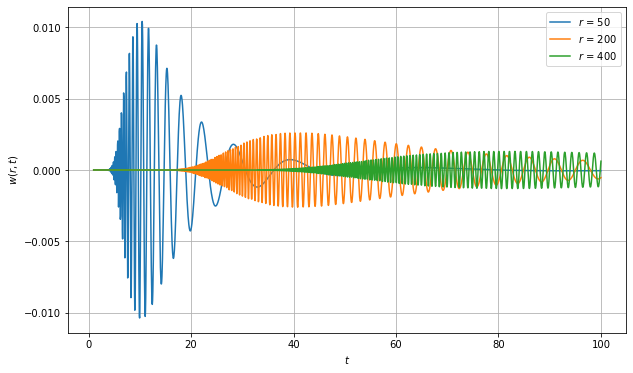

In [64]:
name = 'plate_acceleration_r=[50,200,400]_sf'
plot_results(t, w_solution_sf, r_sections, figname=None, 
             lgd=r'$r$', xl=r'$t$', yl=r'$w(r,t)$', title=None)

### acceleration from radius with time sections

In [60]:
w2_time_sf = lambda t,r,params: w_sf(r,t,params)
w_solution_time_sf = solve(w2_time_sf, t_sections, r, params4)

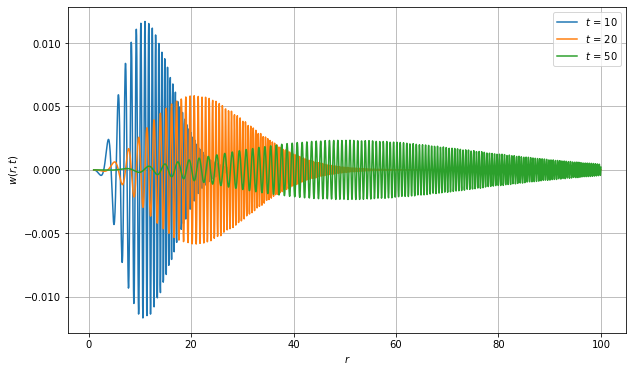

In [84]:
name = 'plate_acceleration_t=[10,20,50]_sf'
plot_results(t, w_solution_time_sf, t_sections, figname=None, 
             lgd=r'$t$', xl=r'$r$', yl=r'$w(r,t)$', title=None)

## Comparing the difference btw two methods

In [87]:
err1 = abs(w_solution2 - w_solution_sf)

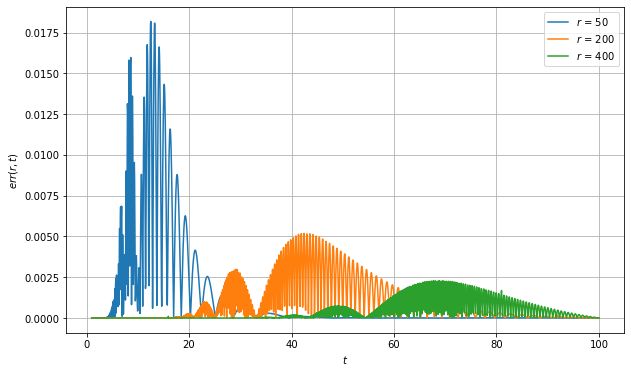

In [94]:
plot_results(t, err1, r_sections, figname='ошибка1', 
             lgd=r'$r$', xl=r'$t$', yl=r'$err(r,t)$', title=None)

In [89]:
err2 = abs(w_solution4 - w_solution_time_sf)

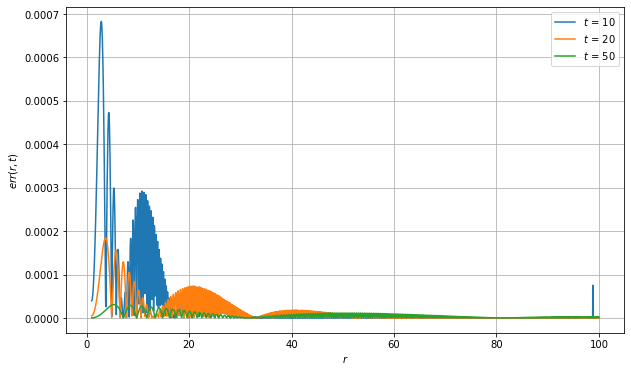

In [95]:
plot_results(t, err2, t_sections, figname='ошибка2', 
             lgd=r'$t$', xl=r'$r$', yl=r'$err(r,t)$', title=None)

## Using the Hankel module [FAILED]

In [7]:
import hankel

In [8]:
ht = hankel.HankelTransform(
    nu= 0     # The order of the bessel function
#     N = 120,   # Number of steps in the integration
#     h = 0.03   # Proxy for "size" of steps in integration
)

In [60]:
r,t,a = 400, 8, 1
quad(integrand2, 0, 1000, args=(r,t,a), limit=500, epsabs=1e-4)

(1.7104364004792026e-06, 9.698329921373036e-05)

In [61]:
f = lambda x: integrand3(x, t, a)
ht.transform(f, k=r, inverse=True)

(1.9114116727012728e-14, array(-2.06875535e-17))

In [54]:
a = 1
j = 1
params3 = (a,j)
r_sections = [50, 200, 400]
t = np.linspace(0, 100, 1000)
w_solution3 = solve(w3, r_sections, t, params3)

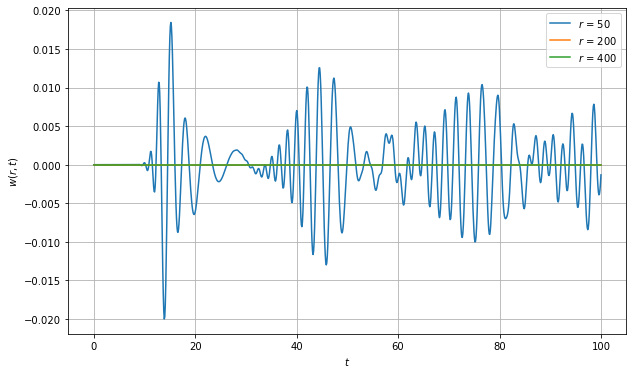

In [55]:
plot_results(t, w_solution3, r_sections, figname=None, 
             lgd=r'$r$', xl=r'$t$', yl=r'$w(r,t)$', title=None)